# Importing Libraries


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#to load the drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


#Data Preprocessing

### Reading The Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/001 My Skills/2.1 CS Engineering   Automated Math (BPHC)/004 Data Science (DS)   Artificial Intelligence (AI)/002 Tabular Cross Sectional Data (Structured Data) (Non Sequential Data)/002 Model Building (Machine Learning (ML)   Predictive Analytics)/001 Supervised Learning/002 Classification Problem/001 Univariate Binary Classification/001 Discriminant Learning/007 Linear Logistic Regression/dataset_LR.csv')
df
df.shape

,attr1,attr2,attr3,attr4,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


(1372, 5)

### Shuffling the Dataset

In [ ]:
  df_shuffle = df.sample(frac=1)
  df_shuffle

,attr1,attr2,attr3,attr4,class
107,-1.85840,7.88600,-1.66430,-1.83840,0
68,1.00090,7.78460,-0.28219,-2.66080,0
9,1.53560,9.17720,-2.27180,-0.73535,0
1252,-2.70830,-6.82660,7.53390,0.59007,1
1019,-0.81720,3.38120,-3.66840,-3.45600,1
...,...,...,...,...,...
1263,-0.87834,3.25700,-3.67780,-3.29440,1
1194,-2.47250,-0.40145,1.48550,1.11890,1
519,3.46690,6.87000,-1.05680,-0.73147,0
816,-4.85540,-5.90370,10.98180,-0.82199,1


### Train Validation Test Split

In [ ]:
#performing 70:10:20 train validation test split 
df_train = df_shuffle.iloc[:math.floor(0.7*df.shape[0])]
df_validation = df_shuffle.iloc[math.ceil(0.7*df.shape[0]):math.ceil(0.8*df.shape[0])]
df_test = df_shuffle.iloc[math.ceil(0.8*df.shape[0]):]

x_train = np.array(df_train.iloc[:,:-1])
y_train = np.array(df_train.iloc[:,-1])
x_validation = np.array(df_validation.iloc[:,:-1])
y_validation = np.array(df_validation.iloc[:,-1])
x_test = np.array(df_test.iloc[:,:-1])
y_test = np.array(df_test.iloc[:,-1])

# Data Learning without using SKLearn Library

### Evaluation Metric Class

In [ ]:
import numpy as np
import math

#pass y_actual and y_pred as numpy row array
class evaluation_metric:

    #constructor
    def __init__(self):
        self.y_pred = 0
        self.y_actual = 0

    def confusion_matrix(self , y_actual , y_pred):
        self.true_positives = 0
        self.true_negatives = 0
        self.false_positives = 0
        self.false_negatives = 0
        for i in range(len(y_actual)):
          if y_actual[i] ==1:
            if y_pred[i] == 1:
              self.true_positives += 1
            else:
              self.false_positives += 1
          else:
            if y_pred[i] == 0:
              self.true_negatives += 1
            else:
              self.false_negatives +=1
        return self.true_positives,self.true_negatives,self.false_positives,self.false_negatives

    def accuracy(self):
      return (self.true_negatives+self.true_positives)/(self.true_positives+self.true_negatives+self.false_negatives+self.false_positives)

    def recall(self):
      return (self.true_positives)/(self.true_positives+self.false_negatives)

    def precision(self):
      return (self.true_positives)/(self.true_positives+self.false_positives)

    def fscore(self):
      return (self.true_positives)/(self.true_positives + 0.5*(self.false_negatives+self.false_positives))

### Logistic Regression Using Gradient Descent

In [ ]:
import numpy as np

class GradientDescent:

  #constructor
  def _init_(self):
    self.X = 0
  
  def fit(self,X,Y,learning_rate = 0.001,no_of_iterations = 10000):
    self.X = X
    self.Y = Y
    
    #adding bias column to X
    bias = [1 for i in range(len(self.Y))]
    df = pd.DataFrame(self.X)
    df.insert(loc=0,column="bias",value=bias)
    self.X = np.array(df)

    #taking all [c,m1,m2...] as [0,0,0.....] as initial random value and representing this in a matrix named theta
    self.current_weights = np.zeros((self.X.shape[1]))   

    # making a list to store error and accuracy every 50 iterations
    self.error_every_50_iteration_list = list()

    #using no of iterations as convergence criteria
    for i in range(no_of_iterations + 1):
      self.error = (-1)*(np.dot(np.log(1/(1+np.exp((-1)*(np.dot(self.current_weights,self.X.T))))),self.Y.T)) + np.dot(np.log(1-(1/(1+np.exp((-1)*(np.dot(self.current_weights,self.X.T)))))),self.Y.T-1)
      self.new_weights = self.current_weights - (learning_rate)*np.dot((1/(1+np.exp((-1)*(np.dot(self.current_weights,self.X.T)))))-self.Y,self.X)
      self.current_weights = self.new_weights

      #storing the error and accuracy after every 50 iterations
      if(i % 50 == 0):
        self.error_every_50_iteration_list.append(self.error)

  # returns an array of [c m1 m2 m3......mn]    
  def coef_(self):      
    return self.new_weights

  #returns no of interations taken and also returns an array with error every 50 iteration
  def error_every_50_iteration(self): 
    return np.array(self.error_every_50_iteration_list)

  #returns an array of predicted values
  def predict(self,x):
    
    #adding bias column to X
    bias = [1 for i in range(x.shape[0])]
    df = pd.DataFrame(x)
    df.insert(loc=0,column="bias",value=bias)
    x = np.array(df)

    return np.array([1 if i>=0 else 0 for i in (np.dot(self.new_weights,x.T))])
    

In [ ]:
#creating objects of the user defined class
gradientdescent_regressor = GradientDescent()
m = evaluation_metric()

*************************************************************Learning Rate = 1e-05 *************************************************

Cofficients : [ 0.60083013 -1.27146694 -0.64113134 -0.67618024 -0.21195492]

Error Every 50 Iterations : [94.96116374 73.70539523 64.37180062 58.35660599 53.85349651 50.26916118
 47.32575924 44.86005213 42.76326724 40.95791321 39.38666458 38.00608112
 36.782659   35.69018356 34.70788488 33.8191199  33.01041351 32.27075058
 31.59104653 30.9637469  30.38252121 29.84202663 29.33772374 28.86573165
 28.42271318 28.005783   27.61243372 27.24047598 26.88798945 26.55328265
 26.23485976 25.93139295 25.64169934 25.36472161 25.09951166 24.84521676
 24.60106771 24.3663688  24.14048911 23.92285507 23.71294403 23.5102786
 23.31442186 23.12497304 22.94156383 22.76385508 22.59153397 22.4243114
 22.26191978 22.10411103 21.95065476 21.80133673 21.65595741 21.51433072
 21.37628287 21.24165137 21.11028407 20.98203835 20.85678037 20.73438437
 20.61473206 20.49771208 20.38321

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iterations')

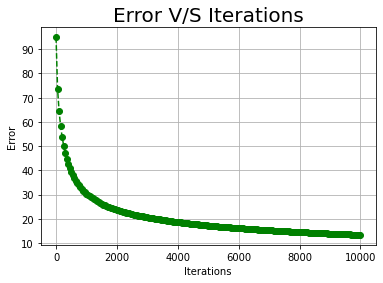

Total Error After Completing Training : 13.378683236387689

Evaluation Metrics for Validation Dataset

True Positives : 52
True Negatives : 81
False Positives : 3
False Negatives : 1
Accuracy : 0.9708029197080292
Precision : 0.9454545454545454
Recall : 0.9811320754716981
F1 score : 0.9629629629629629

*************************************************************Learning Rate = 0.0001 *************************************************

Cofficients : [ 2.40788492 -2.3222907  -1.29197271 -1.57604107 -0.07007233]

Error Every 50 Iterations : [94.96116374 39.25471417 30.3135975  26.19228822 23.68357705 21.92889638
 20.59779789 19.53378229 18.65200733 17.90188228 17.25103132 16.67757657
 16.16608291 15.7052738  15.28667018 14.90374085 14.5513509  14.22539168
 13.92252522 13.64000329 13.37553646 13.12719752 12.89334902 12.67258794
 12.46370305 12.26564149 12.07748228 11.89841523 11.72772382 11.56477129
 11.40898925 11.25986819 11.11694967 10.97981967 10.84810305 10.72145882
 10.59957615 10.482

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iterations')

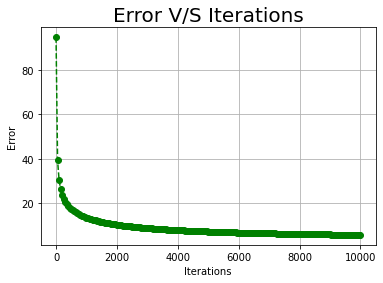

Total Error After Completing Training : 5.505329527738511

Evaluation Metrics for Validation Dataset

True Positives : 55
True Negatives : 81
False Positives : 0
False Negatives : 1
Accuracy : 0.9927007299270073
Precision : 1.0
Recall : 0.9821428571428571
F1 score : 0.990990990990991

*************************************************************Learning Rate = 0.001 *************************************************

Cofficients : [ 5.49428539 -5.16325035 -2.51014604 -3.37221418  0.18279112]

Error Every 50 Iterations : [94.96116374 17.16461302 13.34315811 11.38995977 10.14084809  9.25777026
  8.5952453   8.07757783  7.66067559  7.31685263  7.02776147  6.78073431
  6.56673552  6.37914611  6.21300753  6.06453325  5.93078309  5.80944023
  5.69865506  5.59693348  5.50305571  5.4160162   5.33497865  5.25924184
  5.18821332  5.12138907  5.05833747  4.99868668  4.9421145   4.8883403
  4.83711839  4.7882327   4.74149232  4.69672791  4.65378863  4.61253967
  4.57286005  4.53464093  4.49778399  

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iterations')

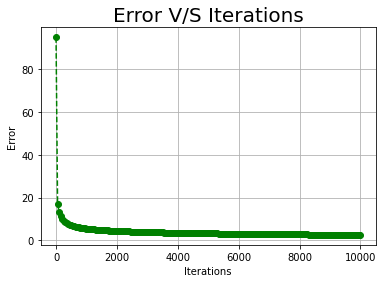

Total Error After Completing Training : 2.587597212769285

Evaluation Metrics for Validation Dataset

True Positives : 55
True Negatives : 82
False Positives : 0
False Negatives : 0
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 score : 1.0



In [ ]:
#********************** Performing hyperparamter tuning to calculate best Hyperparameters i.e. learning rate ********************
learning_rate = [0.00001,0.0001,0.001]
for i in learning_rate:
  print("*************************************************************Learning Rate = {} *************************************************".format(i))
  print("")

  gradientdescent_regressor.fit(x_validation,y_validation,i,10000)
  
  coef = gradientdescent_regressor.coef_()
  print('Cofficients : {}'.format(coef))
  print("")

  error_every_50_iteration = gradientdescent_regressor.error_every_50_iteration()
  print('Error Every 50 Iterations : {}'.format(error_every_50_iteration))
  iterations = [50*i for i in range(len(error_every_50_iteration))]
  plt.figure(1)
  plt.xlabel("Iterations")
  plt.ylabel("Error")
  plt.title("Error V/S Iterations",fontsize = 20)
  plt.plot(iterations,error_every_50_iteration,color='green',linestyle="--",marker='o')
  plt.grid(True)
  plt.show()

  print("Total Error After Completing Training : {}".format(error_every_50_iteration[-1]))
  print("")

  #calculating evaluation metrics for validation dataset
  print("Evaluation Metrics for Validation Dataset")
  print("")
  y_pred_validation = gradientdescent_regressor.predict(x_validation)
  tp,tn,fp,fn = m.confusion_matrix(y_validation,y_pred_validation)
  print("True Positives : {}".format(tp))
  print("True Negatives : {}".format(tn))
  print("False Positives : {}".format(fp))
  print("False Negatives : {}".format(fn))
  print("Accuracy : {}".format(m.accuracy()))
  print("Precision : {}".format(m.precision()))
  print("Recall : {}".format(m.recall()))
  print("F1 score : {}".format(m.fscore()))
  print("")

In [ ]:
# training and testing using best hyperparameter learnt
gradientdescent_regressor.fit(x_train,y_train,0.001,10000)
coef = gradientdescent_regressor.coef_()
print('Cofficients : {}'.format(coef))
print("")

#calculating evaluation metrics for training dataset
print("Evaluation Metrics for Training Dataset")
print("")
y_pred_train = gradientdescent_regressor.predict(x_train)
tp,tn,fp,fn = m.confusion_matrix(y_train,y_pred_train)
print("True Positives : {}".format(tp))
print("True Negatives : {}".format(tn))
print("False Positives : {}".format(fp))
print("False Negatives : {}".format(fn))
print("Accuracy : {}".format(m.accuracy()))
print("Precision : {}".format(m.precision()))
print("Recall : {}".format(m.recall()))
print("F1 score : {}".format(m.fscore()))
print("")

#calculating evaluation metrics for testing dataset
print("Evaluation Metrics for Testing Dataset")
print("")
y_pred_test = gradientdescent_regressor.predict(x_test)
tp,tn,fp,fn = m.confusion_matrix(y_test,y_pred_test)
print("True Positives : {}".format(tp))
print("True Negatives : {}".format(tn))
print("False Positives : {}".format(fp))
print("False Negatives : {}".format(fn))
print("Accuracy : {}".format(m.accuracy()))
print("Precision : {}".format(m.precision()))
print("Recall : {}".format(m.recall()))
print("F1 score : {}".format(m.fscore()))
print("")

Cofficients : [ 5.97218388 -6.8096359  -3.66216812 -4.53819622 -0.61431246]

Evaluation Metrics for Training Dataset

True Positives : 418
True Negatives : 536
False Positives : 3
False Negatives : 3
Accuracy : 0.99375
Precision : 0.9928741092636579
Recall : 0.9928741092636579
F1 score : 0.9928741092636579

Evaluation Metrics for Testing Dataset

True Positives : 120
True Negatives : 150
False Positives : 2
False Negatives : 2
Accuracy : 0.9854014598540146
Precision : 0.9836065573770492
Recall : 0.9836065573770492
F1 score : 0.9836065573770492



### Logistic Regression Using Stochastic Gradient Descent

In [ ]:
import numpy as np
import random

class StochasticGradientDescent:

  #constructor
  def _init_(self):
    self.X = 0

  #returns nothing
  def fit(self,X,Y,learning_rate = 0.000001,no_of_iterations = 10000):
    
    self.X = X
    self.Y = Y

    #adding bias column to X
    bias = [1 for i in range(len(self.Y))]
    df = pd.DataFrame(self.X)
    df.insert(loc=0,column="bias",value=bias)
    self.X = np.array(df)

    #taking all [c,m1,m2...] as [0,0,0.....] and representing this in a matrix named theta
    self.current_weights = np.zeros((self.X.shape[1]))   

    # making a list to store error every 50 iterations
    self.error_every_50_iteration_list = list()

    #using no of iterations as convergence criteria
    for i in range(no_of_iterations + 1):
      #generating a random point
      self.Xp = list()
      self.Yp = list()
      random_no = random.randint(0,len(self.Y)-1)
      self.Xp.append(self.X[random_no])
      self.Yp.append(self.Y[random_no])
      
      #converting list into numpy array cause numpy is very fast
      self.Xp = np.array(self.Xp)
      self.Yp = np.array(self.Yp)
      
      self.error = (-1)*(np.dot(np.log(1/(1+np.exp((-1)*(np.dot(self.current_weights,self.Xp.T))))),self.Yp.T)) + np.dot(np.log(1-(1/(1+np.exp((-1)*(np.dot(self.current_weights,self.Xp.T)))))),self.Yp.T-1)
      self.new_weights = self.current_weights - (learning_rate)*np.dot((1/(1+np.exp((-1)*(np.dot(self.current_weights,self.Xp.T)))))-self.Yp,self.Xp)
      self.current_weights = self.new_weights

      #storing the error after every 50 iterations
      if(i % 50 == 0):
        self.error_every_50_iteration_list.append(self.error)

  #returns an array of estimated parameters [c,m1,m2.....,mn]
  def coef_(self): 
    return self.new_weights

  #returns an array with error every 50 iteration
  def error_every_50_iteration(self):     
    return np.array(self.error_every_50_iteration_list)

  #returns an array of predicted values
  def predict(self,x):
    #adding bias column to X
    bias = [1 for i in range(x.shape[0])]
    df = pd.DataFrame(x)
    df.insert(loc=0,column="bias",value=bias)
    x = np.array(df)
    return np.array([1 if i>=0 else 0 for i in (np.dot(self.new_weights,x.T))])

In [ ]:
#creating objects of the user defined class
stochasticgradientdescent_regressor = StochasticGradientDescent()
m = evaluation_metric()

*************************************************************Learning Rate = 1e-05 *************************************************

Cofficients : [-0.00625827 -0.09612068 -0.09381582  0.00987556  0.00133283]

Error Every 50 Iterations : [0.69314718 0.69179877 0.688441   0.68439384 0.68136141 0.67215301
 0.69855178 0.70222216 0.66522013 0.66175836 0.68248764 0.69316019
 0.70241003 0.70908787 0.70300528 0.62984628 0.63372747 0.70058291
 0.69078081 0.61895879 0.62307134 0.68878778 0.59518173 0.59310256
 0.72635508 0.61544342 0.59689303 0.75982761 0.60500378 0.6048041
 0.58389964 0.53887797 0.65321642 0.64610601 0.6909539  0.66684966
 0.69581756 0.69640794 0.52303497 0.64753916 0.66451703 0.52684417
 0.79215156 0.50203128 0.51525738 0.58172227 0.544456   0.63951552
 0.48767344 0.72570159 0.47836271 0.40703417 0.59359747 0.50669866
 0.5535161  0.59573899 0.53221654 0.61187617 0.43725976 0.6520778
 0.47095053 0.60683892 0.48936    0.51203162 0.53266207 0.86592762
 0.50684427 0.47650135 0.6

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iterations')

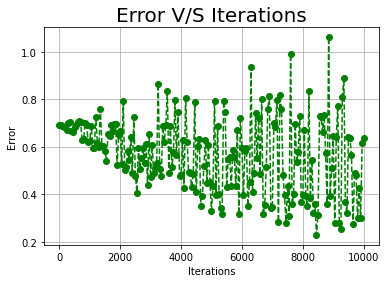

Total Error After Completing Training : 0.6356590996279623

Evaluation Metrics for Validation Dataset

True Positives : 38
True Negatives : 74
False Positives : 17
False Negatives : 8
Accuracy : 0.8175182481751825
Precision : 0.6909090909090909
Recall : 0.8260869565217391
F1 score : 0.7524752475247525

*************************************************************Learning Rate = 0.0001 *************************************************

Cofficients : [ 0.01127746 -0.4869871  -0.23696884 -0.13138757 -0.06111139]

Error Every 50 Iterations : [0.69314718 0.69430192 0.69997388 0.54135832 0.72246983 0.64164113
 0.68909593 0.69441422 0.55533685 0.62758792 0.48093913 0.44297208
 0.42602549 0.34797751 0.85905312 0.52356939 0.28784222 0.36142333
 0.43335751 0.26499807 1.03279373 0.52187839 0.26952059 0.23394097
 0.46564821 0.17928846 0.21975198 0.55163122 0.13343432 0.17969721
 0.19083322 0.26019188 0.1199527  0.46367934 0.1573465  0.14702424
 0.35197498 0.67523122 0.24523332 0.23931078 0.5144001

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iterations')

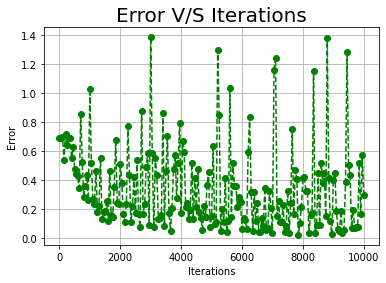

Total Error After Completing Training : 0.29565204295101766

Evaluation Metrics for Validation Dataset

True Positives : 46
True Negatives : 81
False Positives : 9
False Negatives : 1
Accuracy : 0.927007299270073
Precision : 0.8363636363636363
Recall : 0.9787234042553191
F1 score : 0.9019607843137255

*************************************************************Learning Rate = 0.001 *************************************************

Cofficients : [ 0.44591314 -1.15205961 -0.5897012  -0.59320507 -0.20466786]

Error Every 50 Iterations : [6.93147181e-01 5.71099335e-01 3.45918557e-01 7.07735575e-01
 1.84812325e-01 4.96773730e-01 1.13949422e-01 1.63921398e-01
 4.06276443e-01 4.38768827e-02 4.64376548e-02 1.49970690e-01
 1.74482615e-01 2.72303668e-01 4.24663646e-01 4.88471785e-02
 3.37374458e-01 1.84994270e-01 9.51577970e-01 7.70784669e-02
 1.75212511e-01 8.41038269e-02 1.94861292e-01 1.39681490e-01
 1.96680485e-02 3.26303443e-02 4.12782217e-01 4.73339770e-01
 7.78486946e-02 9.28870680e-02 

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error V/S Iterations')

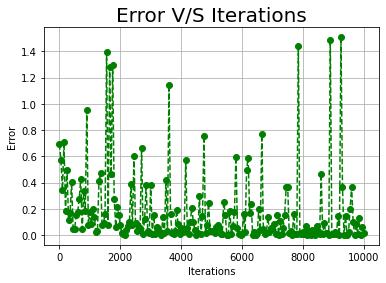

Total Error After Completing Training : 0.01651192787588374

Evaluation Metrics for Validation Dataset

True Positives : 52
True Negatives : 81
False Positives : 3
False Negatives : 1
Accuracy : 0.9708029197080292
Precision : 0.9454545454545454
Recall : 0.9811320754716981
F1 score : 0.9629629629629629



In [ ]:
#********************** Performing hyperparameter tuning to calculate best Hyperparameters i.e. learning rate ********************
learning_rate = [0.00001,0.0001,0.001]
for i in learning_rate:
  print("*************************************************************Learning Rate = {} *************************************************".format(i))
  print("")

  stochasticgradientdescent_regressor.fit(x_validation,y_validation,i,10000)
  coef = stochasticgradientdescent_regressor.coef_()
  print('Cofficients : {}'.format(coef))
  print("")

  error_every_50_iteration = stochasticgradientdescent_regressor.error_every_50_iteration()
  print('Error Every 50 Iterations : {}'.format(error_every_50_iteration))
  iterations = [50*i for i in range(len(error_every_50_iteration))]
  plt.figure(1)
  plt.xlabel("Iterations")
  plt.ylabel("Error")
  plt.title("Error V/S Iterations",fontsize = 20)
  plt.plot(iterations,error_every_50_iteration,color='green',linestyle="--",marker='o')
  plt.grid(True)
  plt.show()
  
  print("Total Error After Completing Training : {}".format(error_every_50_iteration[-1]))
  print("")

  #calculating evaluation metrics for validation dataset
  print("Evaluation Metrics for Validation Dataset")
  print("")
  y_pred_validation = stochasticgradientdescent_regressor.predict(x_validation)
  tp,tn,fp,fn = m.confusion_matrix(y_validation,y_pred_validation)
  print("True Positives : {}".format(tp))
  print("True Negatives : {}".format(tn))
  print("False Positives : {}".format(fp))
  print("False Negatives : {}".format(fn))
  print("Accuracy : {}".format(m.accuracy()))
  print("Precision : {}".format(m.precision()))
  print("Recall : {}".format(m.recall()))
  print("F1 score : {}".format(m.fscore()))
  print("")

In [ ]:
# training and testing using best hyperparameter learnt
stochasticgradientdescent_regressor.fit(x_train,y_train,0.001,10000)
coef = stochasticgradientdescent_regressor.coef_()
print('Cofficients : {}'.format(coef))
print("")

#calculating evaluation metrics for training dataset
print("Evaluation Metrics for Training Dataset")
print("")
y_pred_train = stochasticgradientdescent_regressor.predict(x_train)
tp,tn,fp,fn = m.confusion_matrix(y_train,y_pred_train)
print("True Positives : {}".format(tp))
print("True Negatives : {}".format(tn))
print("False Positives : {}".format(fp))
print("False Negatives : {}".format(fn))
print("Accuracy : {}".format(m.accuracy()))
print("Precision : {}".format(m.precision()))
print("Recall : {}".format(m.recall()))
print("F1 score : {}".format(m.fscore()))
print("")

#calculating evaluation metrics for testing dataset
print("Evaluation Metrics for Testing Dataset")
print("")
y_pred_test = stochasticgradientdescent_regressor.predict(x_test)
tp,tn,fp,fn = m.confusion_matrix(y_test,y_pred_test)
print("True Positives : {}".format(tp))
print("True Negatives : {}".format(tn))
print("False Positives : {}".format(fp))
print("False Negatives : {}".format(fn))
print("Accuracy : {}".format(m.accuracy()))
print("Precision : {}".format(m.precision()))
print("Recall : {}".format(m.recall()))
print("F1 score : {}".format(m.fscore()))
print("")

Cofficients : [ 0.55613937 -1.18128594 -0.62835849 -0.66530589 -0.26611512]

Evaluation Metrics for Training Dataset

True Positives : 420
True Negatives : 516
False Positives : 15
False Negatives : 9
Accuracy : 0.975
Precision : 0.9655172413793104
Recall : 0.9790209790209791
F1 score : 0.9722222222222222

Evaluation Metrics for Testing Dataset

True Positives : 112
True Negatives : 155
False Positives : 7
False Negatives : 0
Accuracy : 0.9744525547445255
Precision : 0.9411764705882353
Recall : 1.0
F1 score : 0.9696969696969697



# Data Learning Using SKLearn Library

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()

In [ ]:
LR_classifier.fit(x_train, y_train)
print("")
print(LR_classifier.coef_)
print(LR_classifier.intercept_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


[[-3.12393012e+00 -1.67774473e+00 -2.07587965e+00 -2.88981229e-03]]
[3.38302894]


In [ ]:
y_test_pred = LR_classifier.predict(x_test)
y_test_prob = LR_classifier.predict_proba(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

#y_test.sum()

[[155   0]
 [  1 118]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       155
           1       1.00      0.99      1.00       119

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



In [ ]:
from sklearn.model_selection import cross_validate
X = df_shuffle.iloc[:,:-1]
Y = df_shuffle.iloc[:,-1]
LR_result = (cross_validate(LR_classifier,X,Y,cv=7,return_train_score=True))
LR_training_accuracy = LR_result['train_score']
LR_testing_accuracy = LR_result['test_score']
print("training accuracy over 7 folds : {}".format(list(LR_training_accuracy)))
print("average training accuracy : {}".format(np.mean(LR_training_accuracy)))
print("")
print("testing accuracy over 7 folds :{}".format(list(LR_testing_accuracy)))
print("average testing accuracy : {}".format(np.mean(LR_testing_accuracy)))

training accuracy over 7 folds : [0.9931972789115646, 0.9897959183673469, 0.9897959183673469, 0.9897959183673469, 0.9906462585034014, 0.9897959183673469, 0.9889455782312925]
average training accuracy : 0.9902818270165208

testing accuracy over 7 folds :[0.9795918367346939, 0.9897959183673469, 0.9897959183673469, 0.9948979591836735, 0.9846938775510204, 0.9948979591836735, 0.9948979591836735]
average testing accuracy : 0.9897959183673469
